In [1]:
# The data_dir variable is the only input allowed to your code. 
# Do not modify any file names in the image directory.
data_dir = "./MASI_pets"
# Add your code in the cells.

In [47]:
from PIL import Image
import os, os.path

path = data_dir
imagename = []
imgs = []
petname = []
ownerInitials = []

valid_images = [".jpg",".gif",".png",".tga",".jpeg"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imagename.append(f)
    imgs.append(Image.open(os.path.join(path,f)))
    name = f.split("_")
    petname.append(name[0])
    ownerInitials.append(name[1][0:2])

width = []
height = []
size = []
for images in imgs:
    w, h = images.size
    size.append(w * h)
    width.append(w)
    height.append(h)

aspect_ratio = []
i = 0
while i < 18:
    aspect_ratio.append(round(width[i] / height[i], 2))
    i += 1


In [3]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [48]:
from tabulate import tabulate

tableHeader = ["image name", "width", "height", "image size", "aspect ratio", "pet name", "owner initials"]
tableContent = []

i2 = 0
while i2 < 18:
    imageAttributes = []
    imageAttributes.append(imagename[i2])
    imageAttributes.append(width[i2])
    imageAttributes.append(height[i2])
    imageAttributes.append(size[i2])
    imageAttributes.append(aspect_ratio[i2])
    imageAttributes.append(petname[i2])
    imageAttributes.append(ownerInitials[i2])
    tableContent.append(imageAttributes)
    i2 += 1

    
tableSorted = sorted(tableContent, key = lambda item: (-item[3], item[5]))
tableSorted.insert(0,tableHeader)

print(tabulate(tableSorted, headers='firstrow'))


image name                   width    height    image size    aspect ratio  pet name            owner initials
-------------------------  -------  --------  ------------  --------------  ------------------  ----------------
Yasha_SR.jpg                  3456      4608      15925248            0.75  Yasha               SR
Arthur_FR.jpg                 3024      4032      12192768            0.75  Arthur              FR
August_XY.jpg                 3024      4032      12192768            0.75  August              XY
Disney_XY.jpg                 4032      3024      12192768            1.33  Disney              XY
Francie_CK.jpg                3024      4032      12192768            0.75  Francie             CK
Hamilton_CK.png               3024      4032      12192768            0.75  Hamilton            CK
Mango_LC.jpg                  3024      4032      12192768            0.75  Mango               LC
Ruby and Buddy_MK.jpg         3024      4032      12192768            0.75  Ruby an

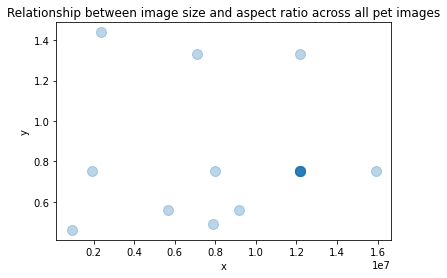

In [68]:
import matplotlib.pyplot as plt

plt.scatter(size, aspect_ratio, s=100, alpha=0.3)
plt.title('Relationship between image size and aspect ratio across all pet images')
plt.xlabel('Image size ()')
plt.ylabel('y')
plt.show()
